### Convulutional Neural Network (CNN)

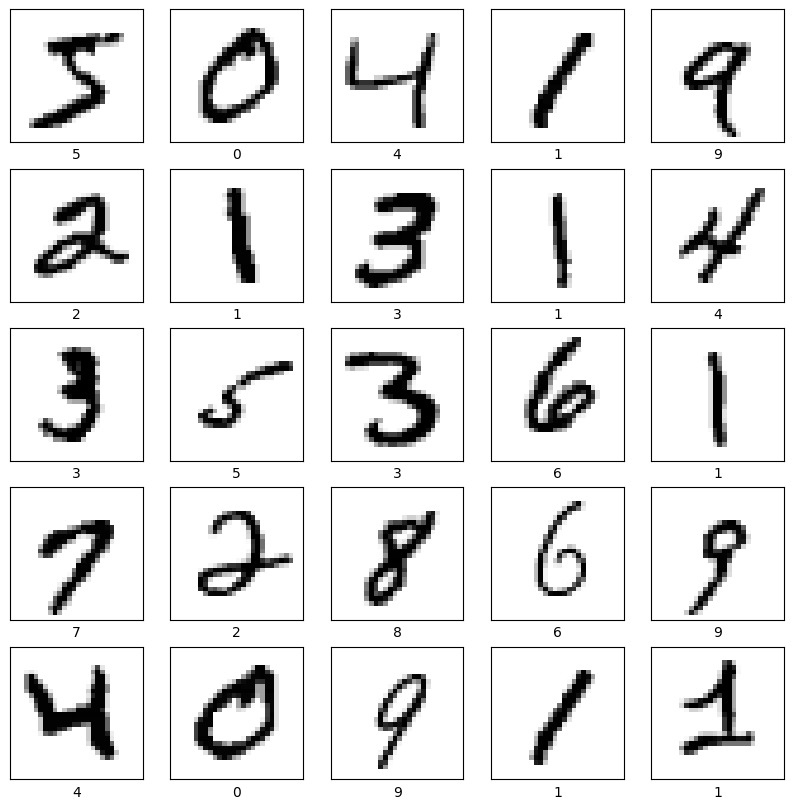

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [2]:
# explore the data
print(f"We have {len(X_train)} images in the training set and {len(X_test)} images in the test set.")
print(f"The size of the images is {X_train[0].shape}.")

We have 60000 images in the training set and 10000 images in the test set.
The size of the images is (28, 28).


In [3]:
X_train[0].shape

(28, 28)

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

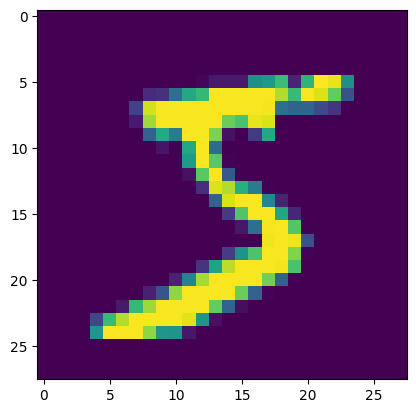

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

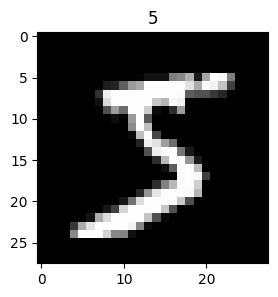

In [6]:
plt.figure(figsize=(3, 3))
plt.imshow(X_train[0], cmap="gray")
plt.title(y_train[0]);

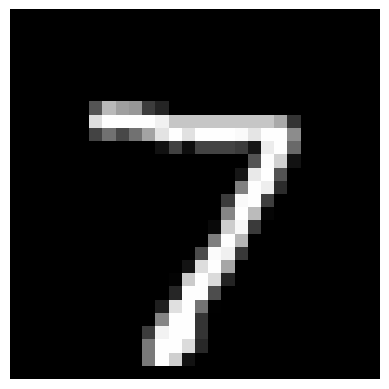

In [7]:
# Select an image from the dataset
import matplotlib.pyplot as plt
image_index = 0  # Change this value to select a different image
image = X_test[image_index]

# Display the original image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

### Each time random Image

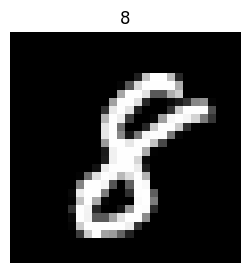

In [8]:
import random
random_image = random.randint(0,  len(X_train))

plt.figure(figsize=(3, 3))
plt.imshow(X_train[random_image], cmap="gray")

plt.title(y_train[random_image])
plt.axis(False);

In [9]:
X_train.shape,  X_test.shape

((60000, 28, 28), (10000, 28, 28))

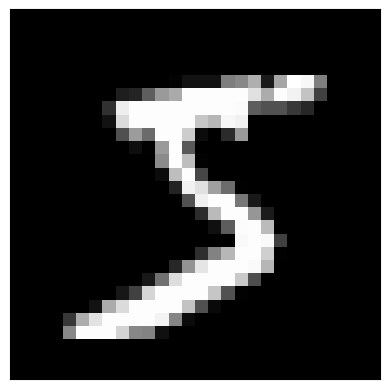

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   

In [10]:
# Display the first image in the dataset as a data matrix
plt.imshow(X_train[0], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Display the values of each pixel in the image
print("Pixel values:")
for row in X_train[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

In [11]:
# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# reshape the data as we do not have 3rd value of an image
X_train = X_train.reshape(X_train.shape+(1,))
X_test = X_test.reshape(X_test.shape+(1,))

X_train.shape,  X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Normalize the data

Neural networks tend to like normalized data and perform better on it. Normalization, in simple terms, means to have the data at the same scale, that is, in our case, between 0 and 1. Let’s normalize our train and test images.

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
X_train.shape,  X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [14]:
# also need to change the data type to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

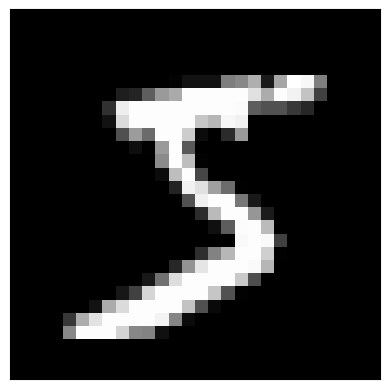


Pixel values after normalization:
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.071 0.071 0.071 0.494 0.533 0.686 0.102 

<Figure size 640x480 with 0 Axes>

<Axes: >

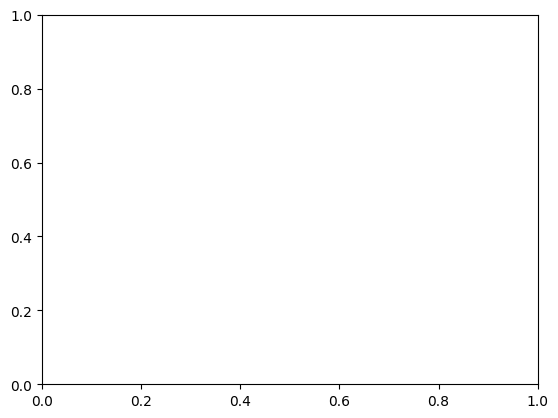

In [15]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Display the first image in the dataset as a data matrix
plt.imshow(x_train[0], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# # Display the values of each pixel in the image before normalization
# print("Pixel values before normalization:")
# for row in x_train[0]:
#     for pixel in row:
#         print("{:3}".format(pixel), end=" ")
#     print()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Display the values of each pixel in the image after normalization
print("\nPixel values after normalization:")
for row in x_train[0]:
    for pixel in row:
        print("{:0.3f}".format(pixel), end=" ")
    print()
    
# Reshape the images to have a channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# Display the complete output of the cell
display(plt.gcf())
display(plt.gca())

### Build the model

In [16]:
import tensorflow as tf
from tensorflow.keras import layers

# Create an input layer
input_layer = layers.Input(shape=(28, 28, 1)) # 28x28 pixel images with 1 color channel (grayscale)

# Build the CNN model
model = tf.keras.Sequential([
    input_layer, # input layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer 
    # filter is the number of filters we want to apply
    # kernel is the size of window/filter moving over the image
    layers.Conv2D(filters=10, kernel_size=(3, 3),  activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    layers.Flatten(), # flatten layer
    layers.Dense(10, activation='softmax') # output layer # why did we add 10?
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 10)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 10)          0         
 g2D)                                                   

In [18]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [19]:
# train the model
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 23s 28ms/step - loss: 0.4019 - accuracy: 0.8721 - val_loss: 0.1651 - val_accuracy: 0.9511
Epoch 2/5
750/750 [==============================] - 23s 30ms/step - loss: 0.1223 - accuracy: 0.9629 - val_loss: 0.0988 - val_accuracy: 0.9688
Epoch 3/5
750/750 [==============================] - 18s 24ms/step - loss: 0.0904 - accuracy: 0.9722 - val_loss: 0.0806 - val_accuracy: 0.9758
Epoch 4/5
750/750 [==============================] - 22s 29ms/step - loss: 0.0746 - accuracy: 0.9775 - val_loss: 0.0702 - val_accuracy: 0.9797
Epoch 5/5
750/750 [==============================] - 31s 42ms/step - loss: 0.0636 - accuracy: 0.9809 - val_loss: 0.0627 - val_accuracy: 0.9818


In [20]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0573 - accuracy: 0.9811
Test Loss: 0.05728292092680931
Test Accuracy: 0.9811000227928162


In [21]:
# lets save the model
model.save("models/digit-recognizer.h5")

c:\Users\User\miniconda3\envs\tf_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [22]:
# Grab an image from the test dataset.
img = X_test[5]

print(img.shape)

(28, 28, 1)


In [24]:
# Add the image to a batch where it's the only member.
import numpy as np
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


In [25]:
pred_digit = model.predict(img)
pred_digit

1/1 [==============================] - 0s 164ms/step


array([[2.6121268e-06, 9.9972242e-01, 1.1770035e-05, 3.8325829e-06,
        2.2277185e-05, 7.2817539e-07, 7.4857635e-06, 2.1507907e-04,
        8.1106309e-06, 5.7259867e-06]], dtype=float32)